In [9]:
import numpy as np
import pandas as pd

from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [10]:
train=  pd.read_csv('data/train.csv')
test=  pd.read_csv('data/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(42000, 784)
[1 0 1 ... 7 6 9]


In [12]:
## On standardise la donnée
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(42000, 784)


In [13]:
# On utilise une partie seulement du dataset car t-SNE consomme beaucoup de ressources 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [14]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

Wall time: 0 ns


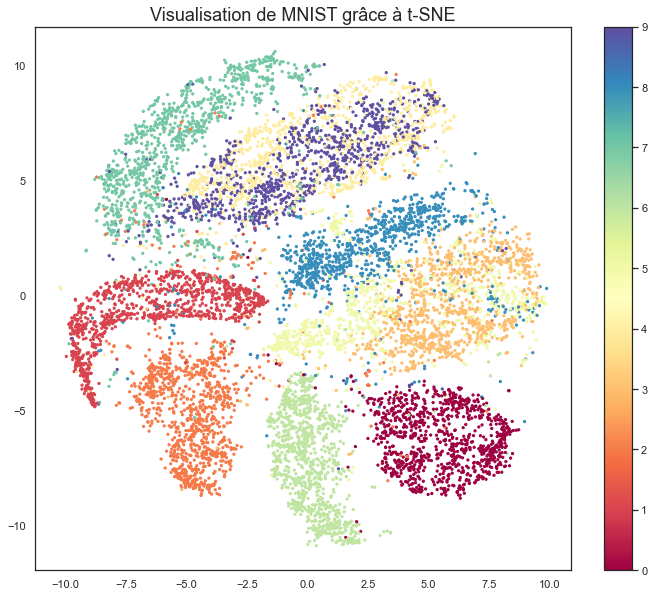

In [15]:
plt.figure(figsize=(12, 10))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.colorbar()
plt.title('Visualisation de MNIST grâce à t-SNE', fontsize=18);
plt.show()